In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED.csv 
df = pd.read_csv('C:/Users/vidis/OneDrive/Desktop/Summer2022/Project Work/gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED.csv')

use the chosen meter-id '28ba7f57-6e83-4341-8078-232c1639e4e3'

In [3]:
#l = list(df['meter_id'].sample(n=5, random_state=1))
df_ = df[df['meter_id']=='28ba7f57-6e83-4341-8078-232c1639e4e3']

In [4]:
df_prod = df_[df_['type'] == 'production']
df_cons = df_[df_['type'] == 'consumption']
df_prod.index = pd.to_datetime(df_prod['timeslot'], utc=True)
df_cons.index = pd.to_datetime(df_cons['timeslot'], utc=True)

Smoothing process

In [5]:
# Centered moving average of timeseries
def moving_average(timeseries, window):
    """Calculate the moving average of a timeseries.

    Args:
        timeseries (pd.Series): timeseries
        window (int): Window size

    Returns:
        pd.Series: Smoothened timeseries
    """
    return timeseries.rolling(window=window, center=True).mean()

def plot_moving_average(timeseries, window=3, plt_title = "Moving average of consumption", y_label="Consumption (kWh)"):
    """Plot moving average of timeseries

    Args:
        timeseries (pd.Series): timeseries
        window (int): Window size
        type (str): Type, consumption or production
    """

    # Clear plot    
    #plt.clf()

    cma = moving_average(timeseries, window)

    #Seaborn style plot
    sns.set(style="darkgrid")

    # # drop nan values in cma
    # cma = cma.dropna()
    # Sort cma by index
    cma = cma.sort_index()
    plt.plot(cma, alpha=0.7)
    # Add plot title
    # plt_title = f"Mo
    # ving average of {type} (Window size {window})"
    plt.title(f"{plt_title} (Window size {window})")
    # Rotate x-axis labels
    plt.xticks(rotation=75)
    plt.figure

    # x-axis label
    plt.xlabel('Time (h)')
    # y-axis label
    plt.ylabel(y_label)
    
    plt.show

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

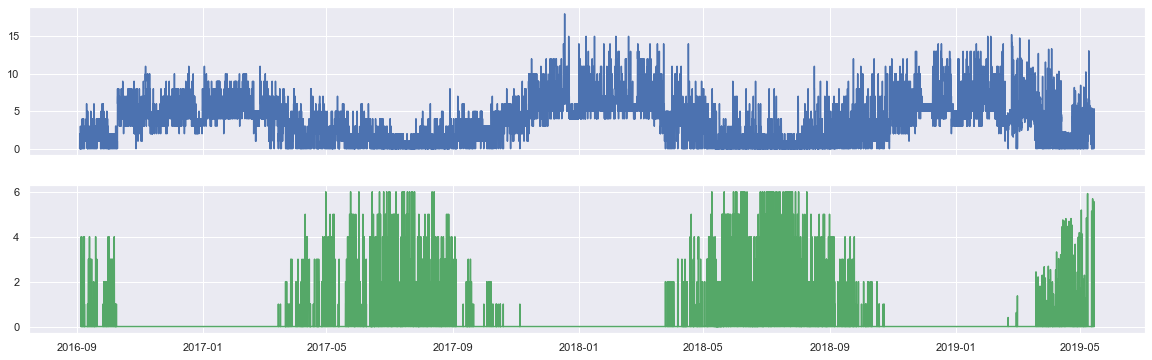

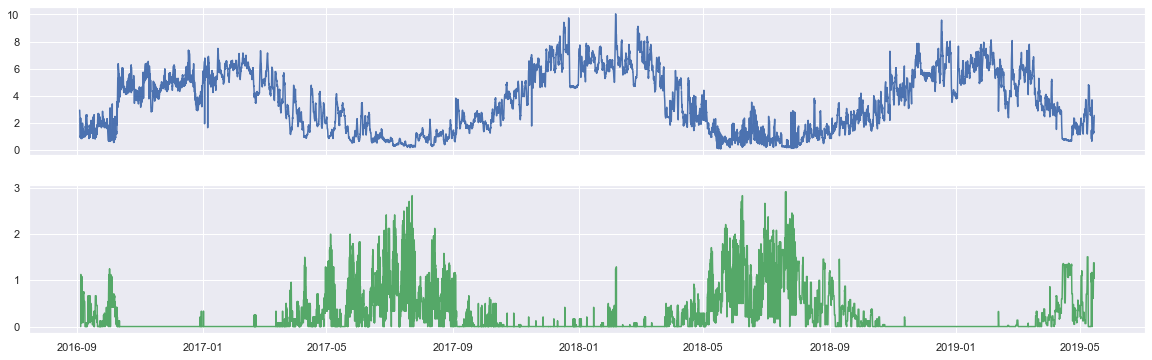

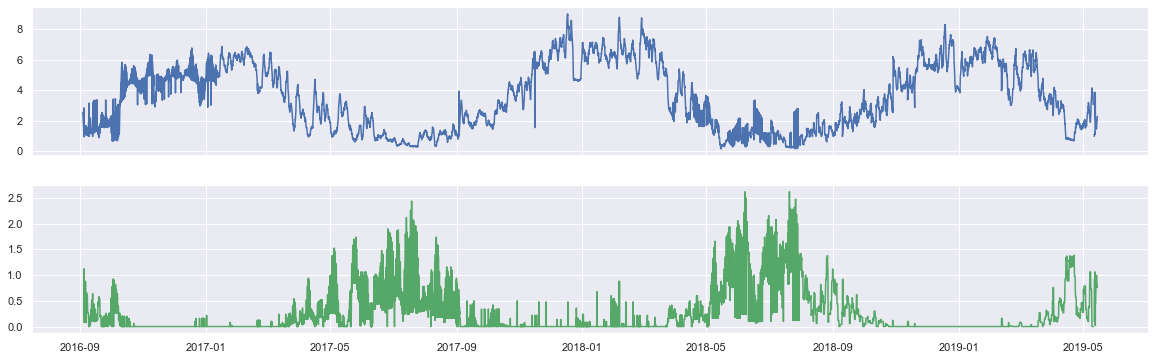

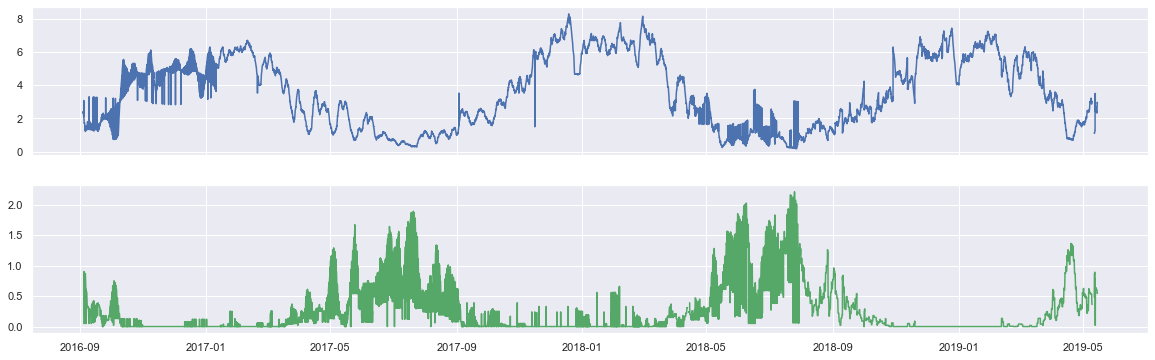

In [6]:
plt.rcParams["figure.figsize"] = (20,6)
sns.set(style="darkgrid")

for window in [1, 24, 50, 100]:
    fig, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols = 1, sharex=True)
    ax1.plot(moving_average(df_cons['num_kwh'],window).sort_index(), color='b')
    #ax1.title('Centered Moving Average of Consumption, Window Size = ')
    ax2.plot(moving_average(df_prod['num_kwh'],window).sort_index(), color='g')
    #ax2.title('Centered Moving Average of Production, Window Size = ')
plt.plot

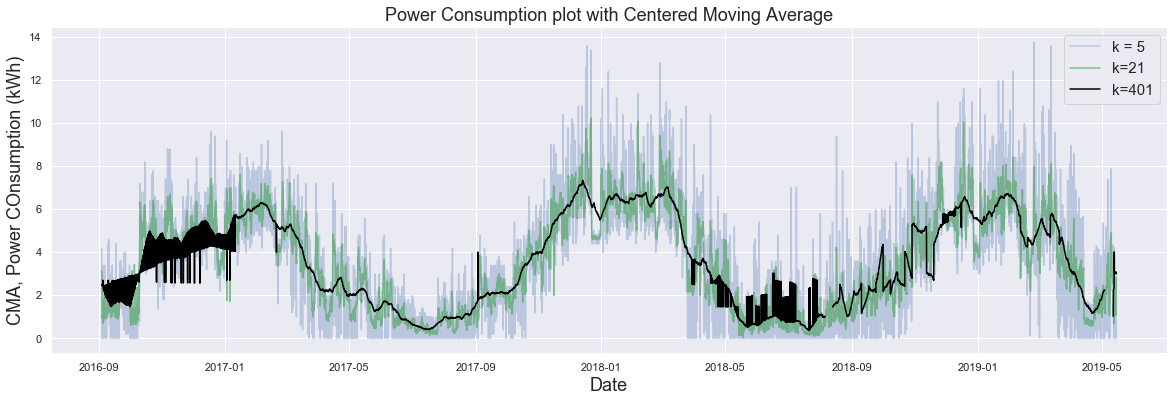

In [30]:
plt.rcParams["figure.figsize"] = (20,6)
sns.set(style="darkgrid")
choices = [5, 21, 401]
a = [0.3,0.7,1]
colors = ['b','g','black']
labels = ['k = 5', 'k=21', 'k=401']
for i in range(3):
    window=choices[i]
    plt.plot(moving_average(df_cons['num_kwh'],window).sort_index(), color=colors[i], alpha=a[i], label=labels[i])
    plt.legend(fontsize=15)
    plt.title('Power Consumption plot with Centered Moving Average', size=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('CMA, Power COnsumption (kWh)', fontsize=18)
plt.show()

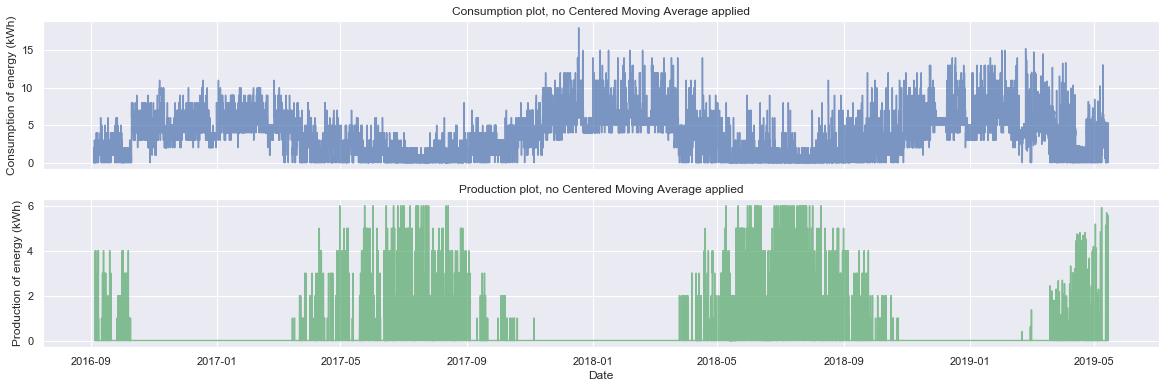

In [11]:
plt.rcParams["figure.figsize"] = (20,6)
plt.rc('axes', titlesize=16)
sns.set(style="darkgrid")

fig, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols = 1, sharex=True)
ax1.plot(moving_average(df_cons['num_kwh'],1).sort_index(), color='b', alpha=0.7)
ax1.title.set_text('Consumption plot, no Centered Moving Average applied')
ax1.set_ylabel('Consumption of energy (kWh)')

ax2.plot(moving_average(df_prod['num_kwh'],1).sort_index(), color='g', alpha=0.7)
ax2.title.set_text('Production plot, no Centered Moving Average applied')
ax2.set_ylabel('Production of energy (kWh)')

plt.xlabel('Date')
plt.show()

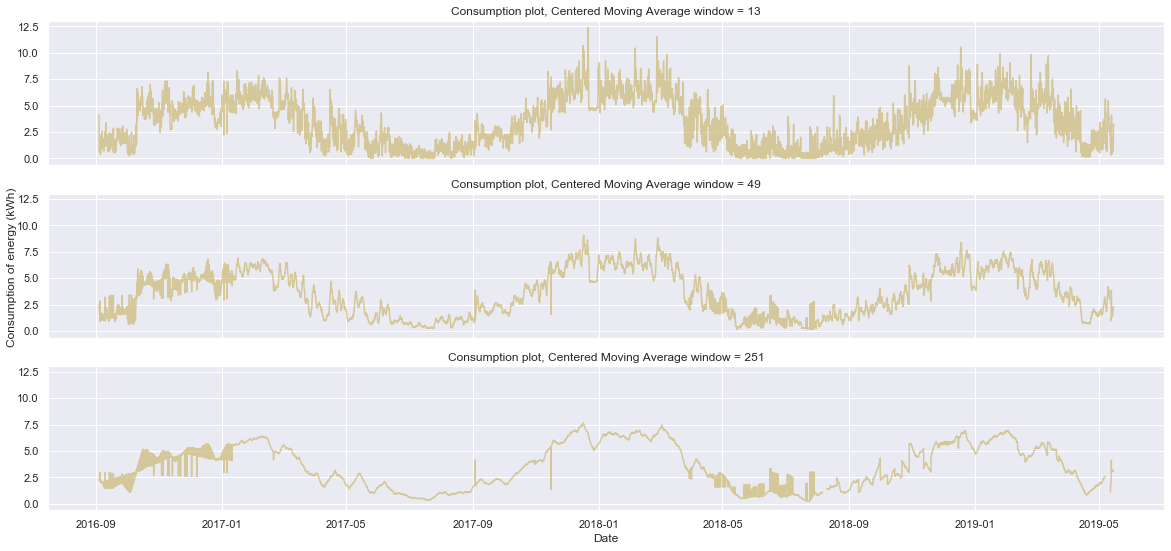

In [55]:
plt.rcParams["figure.figsize"] = (20,9)
sns.set(style="darkgrid")

fig, ((ax1),(ax2), (ax3)) = plt.subplots(nrows=3, ncols = 1, sharex=True, sharey=True)

ax1.plot(moving_average(df_cons['num_kwh'],13).sort_index(), color='y', alpha=0.7)
ax1.title.set_text('Consumption plot, Centered Moving Average window = 13')

#ax2.plot(moving_average(df_cons['num_kwh'],24).sort_index(), color='y', alpha=0.7)
#ax2.title.set_text('Consumption plot, Centered Moving Average window = 24')

ax2.plot(moving_average(df_cons['num_kwh'],49).sort_index(), color='y', alpha=0.7)
ax2.title.set_text('Consumption plot, Centered Moving Average window = 49')

#ax4.plot(moving_average(df_cons['num_kwh'],100).sort_index(), color='y', alpha=0.7)
#ax4.title.set_text('Consumption plot, Centered Moving Average window = 100')

ax3.plot(moving_average(df_cons['num_kwh'],251).sort_index(), color='y', alpha=0.7)
ax3.title.set_text('Consumption plot, Centered Moving Average window = 251')

fig.text(.1, .5, 'Consumption of energy (kWh)', ha='center', va='center', rotation='vertical')
plt.xlabel('Date')
plt.show()

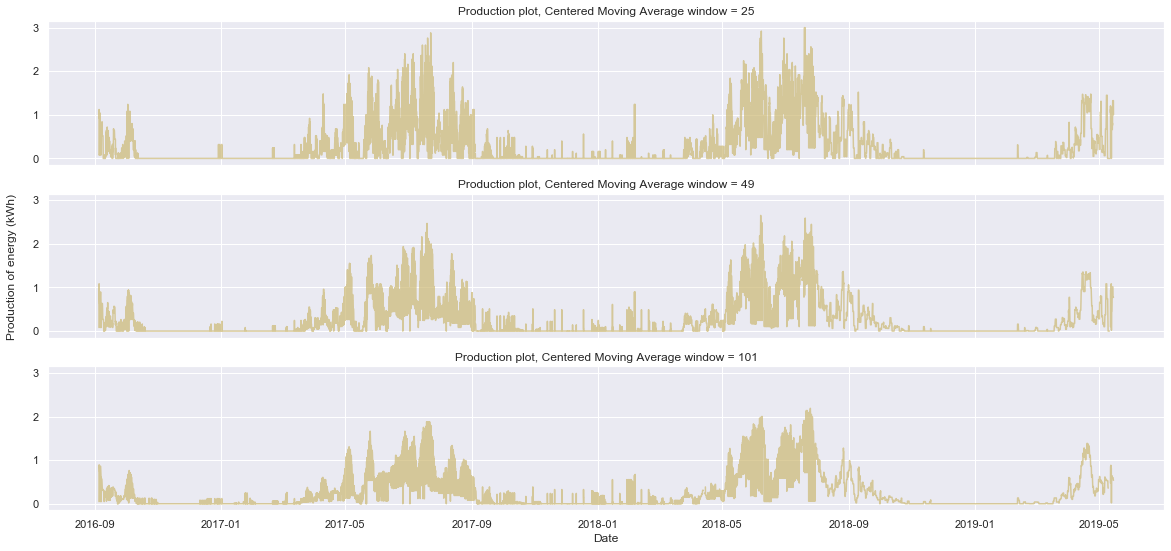

In [13]:
plt.rcParams["figure.figsize"] = (20,9)
sns.set(style="darkgrid")

fig, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols = 1, sharex=True, sharey=True)

ax1.plot(moving_average(df_prod['num_kwh'],25).sort_index(), color='y', alpha=0.7)
ax1.title.set_text('Production plot, Centered Moving Average window = 25')

ax2.plot(moving_average(df_prod['num_kwh'],49).sort_index(), color='y', alpha=0.7)
ax2.title.set_text('Production plot, Centered Moving Average window = 49')

ax3.plot(moving_average(df_prod['num_kwh'],101).sort_index(), color='y', alpha=0.7)
ax3.title.set_text('Production plot, Centered Moving Average window = 101')

fig.text(.1, .5, 'Production of energy (kWh)', ha='center', va='center', rotation='vertical')
plt.xlabel('Date')
plt.show()

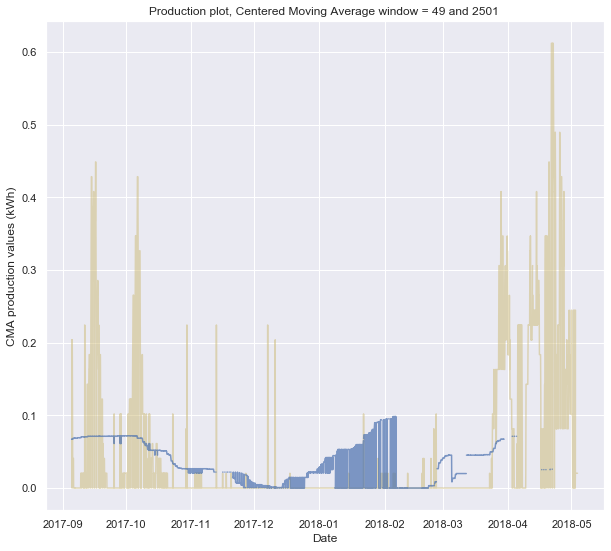

In [70]:
plt.rcParams["figure.figsize"] = (10,9)
plt.plot(moving_average(df_prod['num_kwh'][(df_prod['timeslot']>'2017-09-04 22:00:00+00:00') & (df_prod['timeslot']<'2018-05-04 22:00:00+00:00')],49).sort_index(), color='y', alpha=0.5)
plt.plot(moving_average(df_prod['num_kwh'][(df_prod['timeslot']>'2017-09-04 22:00:00+00:00') & (df_prod['timeslot']<'2018-05-04 22:00:00+00:00')],1501).sort_index(), color='b', alpha=0.7)
plt.title('Production plot, Centered Moving Average window = 49 and 2501 ')
plt.ylabel('CMA production values (kWh)')
plt.xlabel('Date')
plt.show()

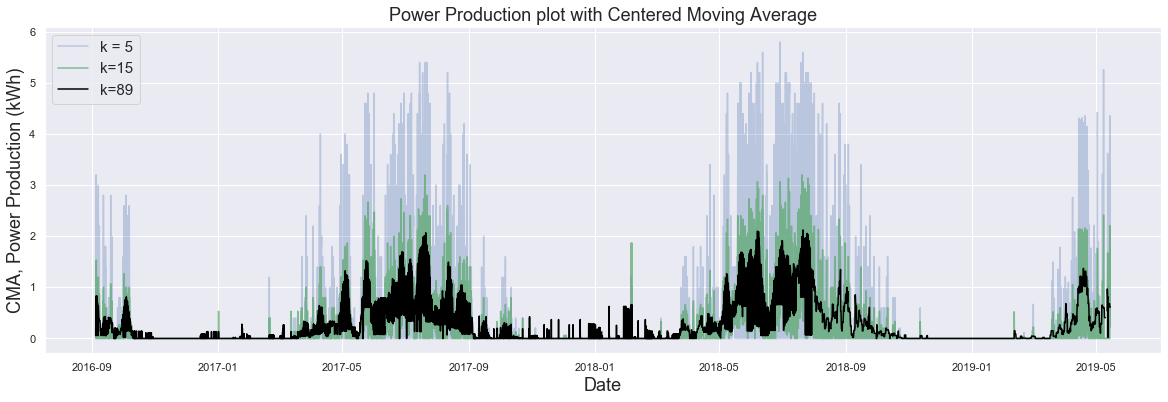

In [44]:
plt.rcParams["figure.figsize"] = (20,6)
sns.set(style="darkgrid")
choices = [5, 15, 89]
a = [0.3,0.7,1]
colors = ['b','g','black']
labels = ['k = 5', 'k=15', 'k=89']
for i in range(3):
    window=choices[i]
    plt.plot(moving_average(df_prod['num_kwh'],window).sort_index(), color=colors[i], alpha=a[i], label=labels[i])
    plt.legend(fontsize=15)
    plt.title('PV-Power Production plot with Centered Moving Average', size=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('CMA, Power Production (kWh)', fontsize=18)
plt.show()

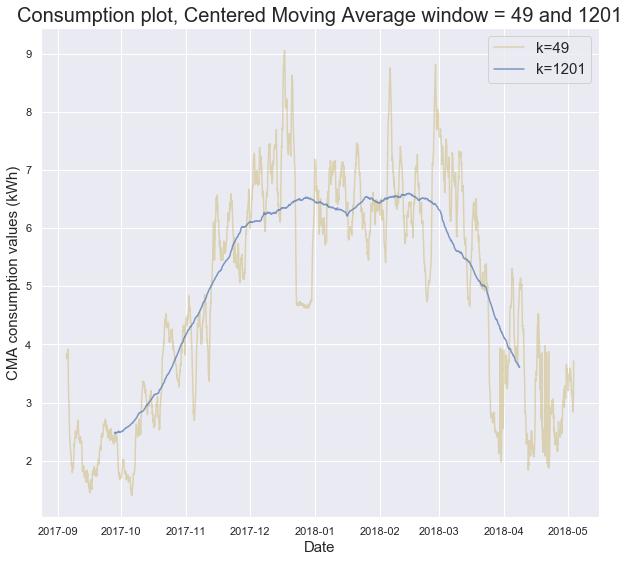

In [35]:
plt.plot(moving_average(df_cons['num_kwh'][(df_cons['timeslot']>'2017-09-04 22:00:00+00:00') & (df_cons['timeslot']<'2018-05-04 22:00:00+00:00')],49).sort_index(), color='y', alpha=0.5, label='k=49')
plt.plot(moving_average(df_cons['num_kwh'][(df_cons['timeslot']>'2017-09-04 22:00:00+00:00') & (df_cons['timeslot']<'2018-05-04 22:00:00+00:00')],1201).sort_index(), color='b', alpha=0.7, label='k=1201')
plt.title('Consumption plot, Centered Moving Average window = 49 and 1201', fontsize=20)
plt.ylabel('CMA consumption values (kWh)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

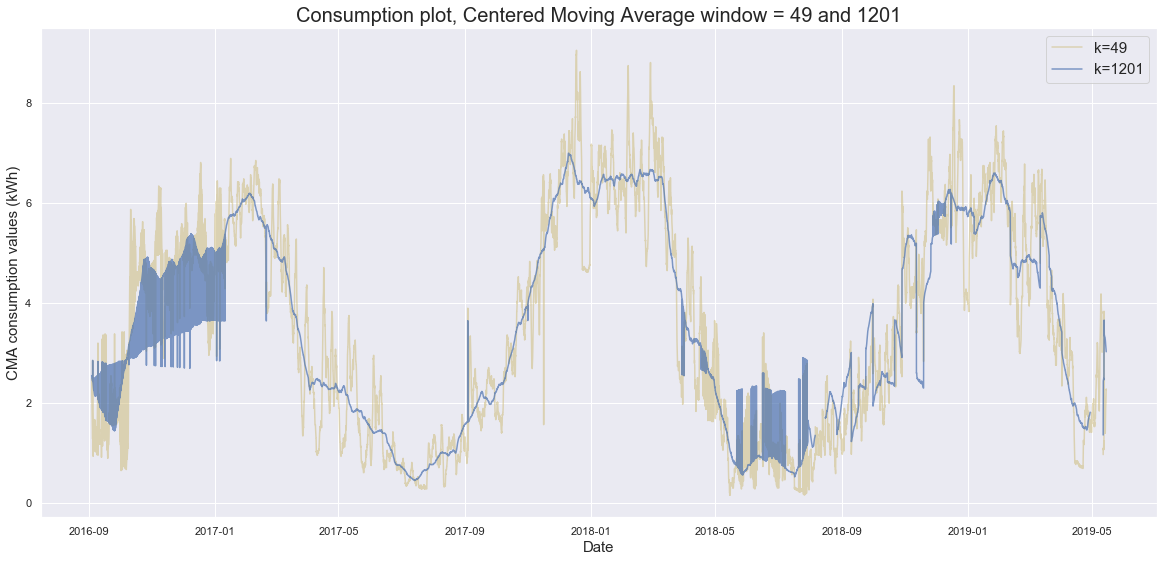

In [59]:
plt.plot(moving_average(df_cons['num_kwh'],49).sort_index(), color='y', alpha=0.5, label='k=49')
plt.plot(moving_average(df_cons['num_kwh'],600).sort_index(), color='b', alpha=0.7, label='k=1201')
plt.title('Consumption plot, Centered Moving Average window = 49 and 1201', fontsize=20)
plt.ylabel('CMA consumption values (kWh)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [16]:
df_prod['timeslot'] = pd.to_datetime(df_prod['timeslot'], errors='coerce', utc=True)
df_cons['timeslot'] = pd.to_datetime(df_cons['timeslot'], errors='coerce', utc=True)
df_prod['month'] = df_prod['timeslot'].dt.month
df_cons['month'] = df_cons['timeslot'].dt.month

C:\Users\vidis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vidis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vidis\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

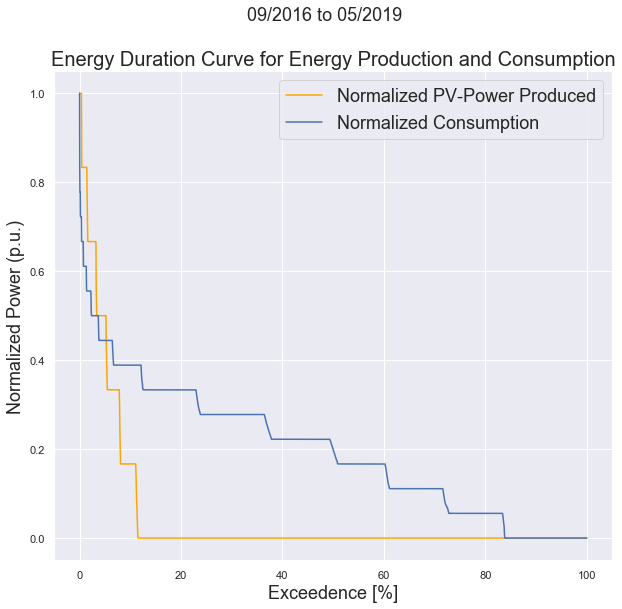

In [17]:
plt.rcParams["figure.figsize"] = (10,9)

data = (df_prod['num_kwh']-df_prod['num_kwh'].min())/(df_prod['num_kwh'].max()-df_prod['num_kwh'].min())
data2 = (df_cons['num_kwh']-df_cons['num_kwh'].min())/(df_cons['num_kwh'].max()-df_cons['num_kwh'].min())

sort = np.sort(data)[::-1]
exceedence = np.arange(1.,len(sort)+1) / len(sort)
sort2 = np.sort(data2)[::-1]
exceedence2 = np.arange(1.,len(sort2)+1) / len(sort2)

plt.plot(exceedence*100, sort, color='orange', label = 'Normalized PV-Power Produced')
plt.plot(exceedence2*100, sort2, color = 'b', label = 'Normalized Consumption')
plt.xlabel("Exceedence [%]", fontsize=18)
plt.ylabel("Normalized Power (p.u.)", fontsize=18)
plt.title('Energy Duration Curve for Energy Production and Consumption', size=20)
plt.suptitle('09/2016 to 05/2019', fontsize=18)
plt.legend(fontsize=18)
plt.show()

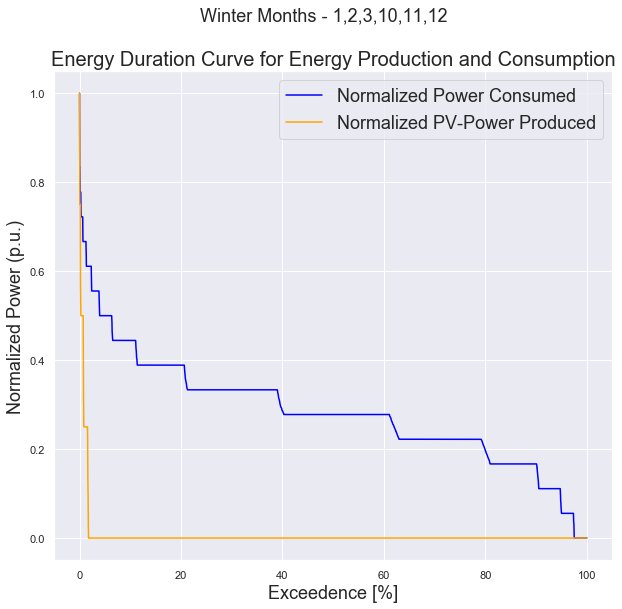

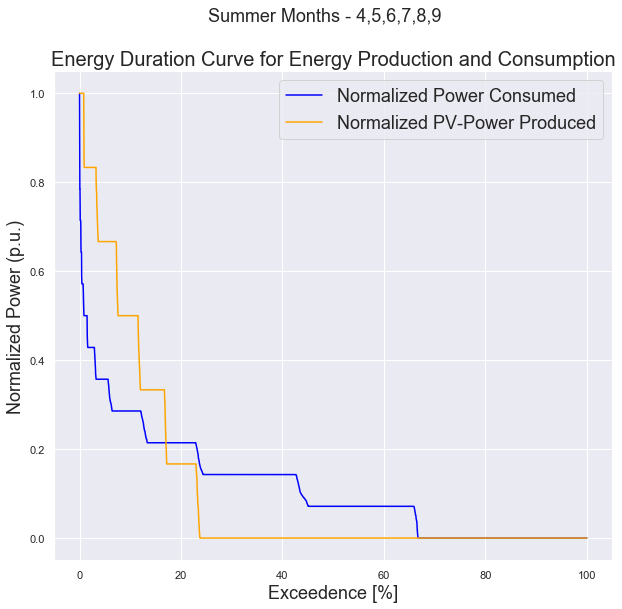

In [18]:
plt.rcParams["figure.figsize"] = (10,9)

df_cwin = df_cons[df_cons['month'].isin([1,2,3,10,11,12])]
df_csum = df_cons[df_cons['month'].isin([4,5,6,7,8,9])]

df_pwin = df_prod[df_prod['month'].isin([1,2,3,10,11,12])]
df_psum = df_prod[df_prod['month'].isin([4,5,6,7,8,9])]

d_cwin = (df_cwin['num_kwh']-df_cwin['num_kwh'].min())/(df_cwin['num_kwh'].max()-df_cwin['num_kwh'].min())
d_csum = (df_csum['num_kwh']-df_csum['num_kwh'].min())/(df_csum['num_kwh'].max()-df_csum['num_kwh'].min())
d_pwin = (df_pwin['num_kwh']-df_pwin['num_kwh'].min())/(df_pwin['num_kwh'].max()-df_pwin['num_kwh'].min())
d_psum = (df_psum['num_kwh']-df_psum['num_kwh'].min())/(df_psum['num_kwh'].max()-df_psum['num_kwh'].min())

color = ['blue', 'orange']
label = ['Normalized Power Consumed', 'Normalized PV-Power Produced']

for i, data in enumerate([d_cwin, d_pwin]):
    sort = np.sort(data)[::-1]
    exceedence = np.arange(1.,len(sort)+1) / len(sort)
    plt.plot(exceedence*100, sort, label = label[i], color=color[i])
    
plt.xlabel("Exceedence [%]", fontsize=18)
plt.ylabel("Normalized Power (p.u.)", fontsize=18)
plt.title('Energy Duration Curve for Energy Production and Consumption', size=20)
plt.suptitle('Winter Months - 1,2,3,10,11,12', fontsize=18)
plt.legend(fontsize=18)
plt.show()

for i, data in enumerate([d_csum, d_psum]):
    sort = np.sort(data)[::-1]
    exceedence = np.arange(1.,len(sort)+1) / len(sort)
    plt.plot(exceedence*100, sort, label = label[i], color=color[i])
    
plt.xlabel("Exceedence [%]", fontsize=18)
plt.ylabel("Normalized Power (p.u.)", fontsize=18)
plt.title('Energy Duration Curve for Energy Production and Consumption', size=20)
plt.suptitle('Summer Months - 4,5,6,7,8,9', fontsize=18)
plt.legend(fontsize=18)
plt.show()

In [19]:
sum(np.sort(d_cwin)[::-1]-np.sort(d_pwin)[::-1])

3635.769138888744

In [20]:
d_csum = pd.DataFrame(d_csum)
d_summer = d_csum.merge(d_psum, how='inner', on='timeslot')
d_summer['bools'] = d_summer['num_kwh_x']>=d_summer['num_kwh_y']
d_summer['vals'] = d_summer['num_kwh_x']-d_summer['num_kwh_y']
sum(d_summer['vals'])

75.3863571428632

In [21]:
sum(d_summer['vals'][d_summer['bools']==False])

-1109.997999999997

In [22]:
sum(d_summer['vals'][d_summer['bools']==True])

1185.3843571428138

In [71]:
d_cwin = pd.DataFrame(d_cwin)
d_winter = d_cwin.merge(d_pwin, how='inner', on='timeslot')
d_winter['bools'] = d_winter['num_kwh_x']>=d_winter['num_kwh_y']
d_winter['vals'] = d_winter['num_kwh_x']-d_winter['num_kwh_y']
sum(d_winter['vals'])

3635.7691388889443

In [72]:
sum(d_winter['vals'][d_winter['bools']==True])

3722.206888888952

In [73]:
sum(d_winter['vals'][d_winter['bools']==False])

-86.43775000000005

In [74]:
max(df['timeslot'])

'2019-05-14 23:00:00+02'